In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [13]:
from sklearn.datasets import load_wine
dat=load_wine()
df=pd.DataFrame(dat.data)

In [15]:
dat.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [16]:
df.columns=dat.feature_names

In [17]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [18]:
df_ex=df[['malic_acid','flavanoids']]
df_ex

,malic_acid,flavanoids
0,1.71,3.06
1,1.78,2.76
2,2.36,3.24
3,1.95,3.49
4,2.59,2.69
...,...,...
173,5.65,0.61
174,3.91,0.75
175,4.28,0.69
176,2.59,0.68


In [19]:
# Instanciar escalador estándar
scaler = StandardScaler()
# Ajustar y transformar datos
scaled_df = scaler.fit_transform(df_ex)

dendograma

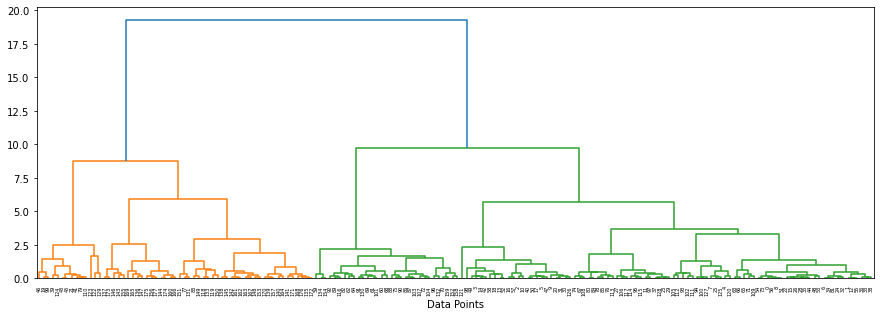

In [20]:
plt.figure(figsize = (15, 5))
sch.dendrogram(sch.linkage(scaled_df, method = 'ward'))
plt.xlabel('Data Points');

Pero ahora de forma más visual

In [21]:
hc = AgglomerativeClustering(n_clusters = 2)
hc.fit(scaled_df)

AgglomerativeClustering()

/var/folders/6y/9fksy1pj1bnbf51v6nyzx6fc0000gn/T/ipykernel_33024/2624682524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ex['cluster'] = hc.labels_


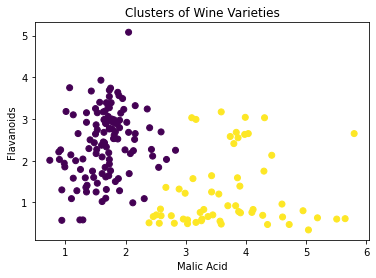

In [22]:
# Guardar las etiquetas del clúster en el marco de datos
df_ex['cluster'] = hc.labels_
# Visualizar los clusters
plt.scatter(df_ex['malic_acid'], df_ex['flavanoids'], c = df_ex['cluster'])
plt.xlabel('Malic Acid')
plt.ylabel('Flavanoids')
plt.title('Clusters of Wine Varieties');

agrandando la cantidad de clusters

/var/folders/6y/9fksy1pj1bnbf51v6nyzx6fc0000gn/T/ipykernel_33024/3579510006.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ex['cluster'] = hc.labels_


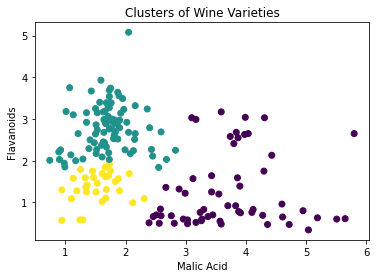

In [23]:
hc = AgglomerativeClustering(n_clusters =3)
hc.fit(scaled_df)
# Guardar las etiquetas del clúster en el marco de datos
df_ex['cluster'] = hc.labels_
# Visualizar los clusters
plt.scatter(df_ex['malic_acid'], df_ex['flavanoids'], c = df_ex['cluster'])
plt.xlabel('Malic Acid')
plt.ylabel('Flavanoids')
plt.title('Clusters of Wine Varieties');

# Con DBSCAN

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

Tambien se escalan los datos

In [25]:
from sklearn.datasets import load_wine
dat=load_wine()
df=pd.DataFrame(dat.data)

In [26]:
df.columns=dat.feature_names

In [27]:
df_ex=df[['malic_acid','flavanoids']]
df_ex

,malic_acid,flavanoids
0,1.71,3.06
1,1.78,2.76
2,2.36,3.24
3,1.95,3.49
4,2.59,2.69
...,...,...
173,5.65,0.61
174,3.91,0.75
175,4.28,0.69
176,2.59,0.68


In [28]:
# Instanciar escalador estándar
scaler = StandardScaler()
# Ajustar y transformar datos
scaled_df = scaler.fit_transform(df_ex)

In [37]:
dbs = DBSCAN(eps = 0.5, min_samples = 5).fit(scaled_df)

/var/folders/6y/9fksy1pj1bnbf51v6nyzx6fc0000gn/T/ipykernel_33024/3535254116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ex['cluster'] = dbs.labels_


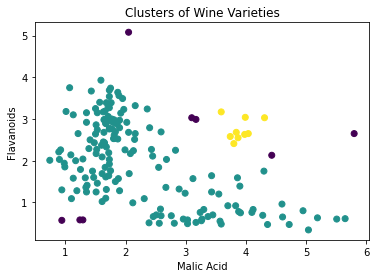

In [38]:
# Guardar las etiquetas del clúster en el marco de datos
df_ex['cluster'] = dbs.labels_
# Visualizar los clústers
plt.scatter(df_ex['malic_acid'], df_ex['flavanoids'], c = df_ex['cluster'])
plt.xlabel('Malic Acid')
plt.ylabel('Flavanoids')
plt.title('Clusters of Wine Varieties');

# Las metricas 

Para este caso, los modelos no tienen una metrica en concreto que indique que tan buenos son las clasificaciones, la unica forma de hacerlo es heuristicamente que permite tener indicios de cual es la mejor agrupacion dada la densidad y coherencia de los datos
precisamente estamos hablando del puntaje de la silueta que calcula esto y entreg un valor de 1 a -1 siendo 1 el mejor y -1 el peor
,veamos el caso anterior con todos los algoritmos

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [40]:
from sklearn.datasets import load_wine
dat=load_wine()
df=pd.DataFrame(dat.data)

In [41]:
df.columns=dat.feature_names

In [42]:
df_ex=df[['malic_acid','flavanoids']]
df_ex

,malic_acid,flavanoids
0,1.71,3.06
1,1.78,2.76
2,2.36,3.24
3,1.95,3.49
4,2.59,2.69
...,...,...
173,5.65,0.61
174,3.91,0.75
175,4.28,0.69
176,2.59,0.68


In [43]:
# Instanciar escalador estándar
scaler = StandardScaler()
# Ajustar y transformar datos
scaled_df = scaler.fit_transform(df_ex)

Kmeans

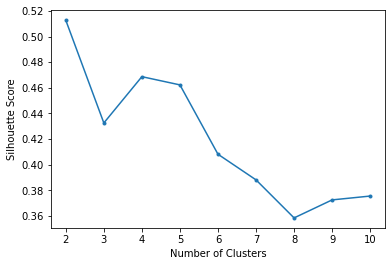

In [44]:
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [45]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

0.5127594622163579

Agrupación jerarquica

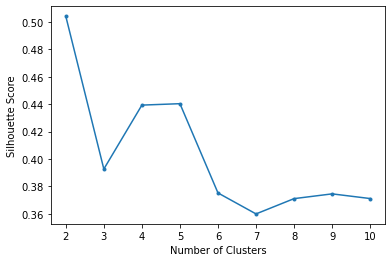

In [47]:
silhouette_scores = []
for i in range(2, 11):
  hc = AgglomerativeClustering(n_clusters =i)
  hc.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, hc.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

Con DBSCAN

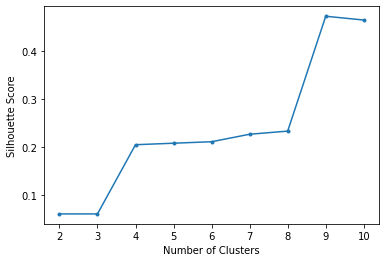

In [48]:

silhouette_scores = []
for i in range(2, 11):
    dbs = DBSCAN(eps = 0.5, min_samples = i)
    dbs.fit(scaled_df)
    silhouette_scores.append(silhouette_score(scaled_df, dbs.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');